In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.image import imread

In [40]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, Activation
from tensorflow.keras.optimizers import SGD

In [3]:
!pwd

/Users/axr524/Documents/Projects/Image recognition


In [4]:
data_dir = "/Users/axr524/Documents/Projects/Image recognition"

In [5]:
os.listdir(data_dir)

['untitled folder',
 '.DS_Store',
 'Image_classifier.ipynb',
 'Training',
 'Testing',
 '.ipynb_checkpoints']

In [6]:
train_path = data_dir + "/Training/"
test_path = data_dir + "/Testing/"

In [7]:
'.DS_Store' in os.listdir(train_path+'/dogs')

True

In [8]:
dog_img = train_path + '/dogs/' + 'images - 2020-06-05T092954.424.jpg'
cat_img = train_path + '/cats/' + 'images - 2020-06-05T094500.934.jpg'

In [9]:
d1 = []
d2 = []
for image_filename in os.listdir(train_path + '/cats/'):
    if image_filename == '.DS_Store':
        pass
    else:
        img = imread(train_path + '/cats/' + image_filename)
    
        dim1,dim2,colors = img.shape
        d1.append(dim1)
        d2.append(dim2)
    

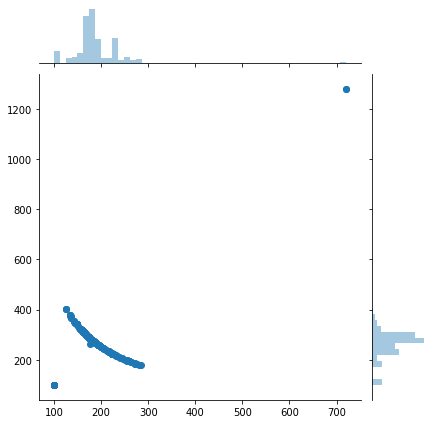

In [10]:
sns.jointplot(d1,d2)

In [11]:
np.mean(d1)

186.54090150250417

In [12]:
np.mean(d2)

265.36060100166947

In [13]:
image_shape = (150,200,3)

In [ ]:
sns.distplot(d1)

In [ ]:
sns.distplot(d2)

## Data augmentation: image transformation

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module tensorflow.python.keras.preprocessing.image:

class ImageDataGenerator(keras_preprocessing.image.image_data_generator.ImageDataGenerator)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None)
 |  
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |   The data will be looped over (in batches).
 |  
 |  Arguments:
 |      featurewise_center: Boolean.
 |          Set input mean to 0 over the dataset, feature-wise.
 |      samplewise_center: Boolean. Set each sample mean to 0

In [16]:
image_gen =ImageDataGenerator(rotation_range=20,
                             featurewise_center=True,
                             featurewise_std_normalization=True,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             rescale=1/255,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=False,
                             vertical_flip=True,
                             fill_mode='nearest')

In [17]:
# Set path to the image
image_gen.flow_from_directory(train_path)

Found 1244 images belonging to 2 classes.


In [18]:
image_gen.flow_from_directory(test_path)

Found 265 images belonging to 2 classes.


## Building the model

In [46]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape,activation='relu'))
#model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

#model.add(Dense(1,activation='sigmoid'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

opt = SGD(lr=0.1)
model.compile(loss = 'binary_crossentropy',
             optimizer = opt,
             metrics = ['accuracy'])

In [47]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 148, 198, 32)      896       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 74, 99, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 72, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 36, 48, 64)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 34, 46, 64)        36928     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 17, 23, 64)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 15, 21, 128)      

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

In [21]:
early_stop = EarlyStopping(monitor = 'val_loss', patience=2)

In [22]:
batch_size = 16

In [33]:
train_image_gen = image_gen.flow_from_directory(train_path, 
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 1244 images belonging to 2 classes.


In [34]:
test_image_gen = image_gen.flow_from_directory(test_path, 
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',
                                               shuffle=False)

Found 265 images belonging to 2 classes.


In [35]:
train_image_gen.class_indices

{'cats': 0, 'dogs': 1}

In [ ]:
results = model.fit_generator(train_image_gen,epochs=200,validation_data=test_image_gen,callbacks=[early_stop])

Epoch 1/200


/Users/axr524/anaconda3/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/Users/axr524/anaconda3/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


78/78 [==============================] - 51s 649ms/step - loss: 0.6960 - accuracy: 0.5008 - val_loss: 0.6948 - val_accuracy: 0.4755
Epoch 2/200
78/78 [==============================] - 56s 716ms/step - loss: 0.6924 - accuracy: 0.5064 - val_loss: 0.6918 - val_accuracy: 0.5774
Epoch 3/200
78/78 [==============================] - 54s 690ms/step - loss: 0.6929 - accuracy: 0.5297 - val_loss: 0.6860 - val_accuracy: 0.6491
Epoch 4/200
25/78 [========>.....................] - ETA: 29s - loss: 0.6918 - accuracy: 0.5250